## Introduction to Penguin Analysis Project with EDA and Data Visualization in Python

The dataset is taken from Kaggle. It is the Palmer Archipelago (penguin) dataset.

First, we import the required libraries.

`pandas` for dataframe purposes.

`numpy` for mathematical operations.

`seaborn` and `matplotlib` for graphical purposes.

`sklearn` for regression problems.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

Now, we load the data and see the first 10 rows of it.

In [2]:
df=pd.read_csv("penguins_size.csv")
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


Next , we see some information about our dataframe.

It has `7` columns and `344` rows.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


We see if there are any NA or missing values in the columns.

In [4]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


Next, we replace the missing missing or other non numeric values in the numerical columns and `NaN` and drop them from our dataset.

In [5]:
df=df.replace('.',np.nan)
df1=df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### Research Questions

1. Construct a suitable diagram to study if there is dominance of sex of the penguins across different species.
2. Using diagrams and measures, as you find suitable, make a detailed study of the body mass of the penguins.
3. Which of the following among culmen length, culmen depth and flipper length is most appropriate for predicting body mass?

## EDA and Modelling

### Question 1:

Construct a suitable diagram to study if there is dominance of sex of the penguins across different species.

In [6]:
hist_data=df1.groupby(['species','sex']).size()
hist_data

species    sex   
Adelie     FEMALE    73
           MALE      73
Chinstrap  FEMALE    34
           MALE      34
Gentoo     FEMALE    58
           MALE      61
dtype: int64

<Axes: title={'center': 'Grouped Bar Graph with dataframe'}, xlabel='species,sex'>

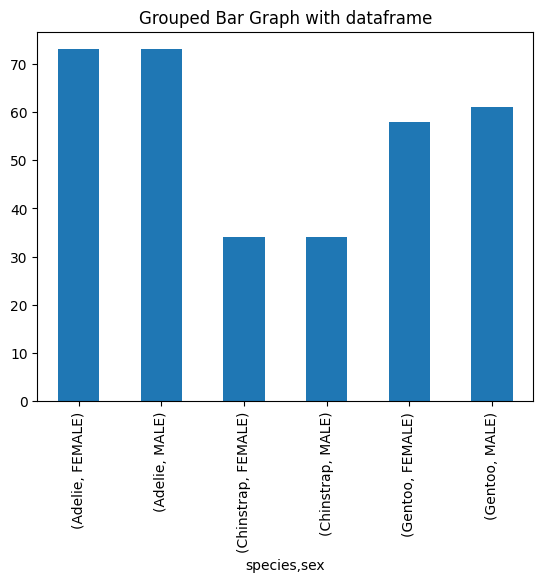

In [7]:
hist_data.plot(x='species',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')

From the above diagram, we can see that two species namely Adelie and Chinstrap have same dominance of sex whereas the species, Gentoo has slightly higher male dominance of sex.

### Question 2:

Using diagrams and measures, as you find suitable, make a detailed study of the body mass of the penguins.

We compute the descriptive summary statistics for body mass of the penguins and then plot a histogram of it.

In [8]:
body_mass=df1['body_mass_g']
body_mass.describe().astype('int')

count     333
mean     4207
std       805
min      2700
25%      3550
50%      4050
75%      4775
max      6300
Name: body_mass_g, dtype: int32

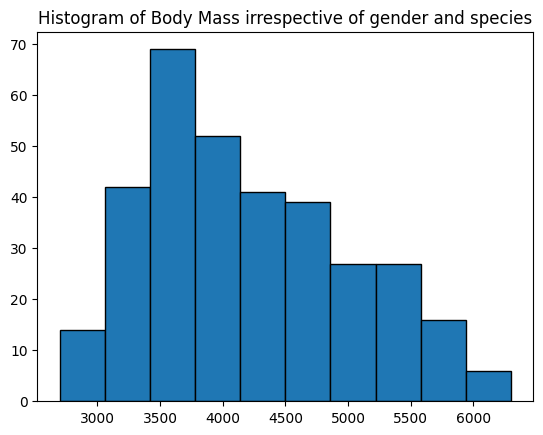

In [9]:
plt.hist(body_mass,edgecolor='black')
plt.title('Histogram of Body Mass irrespective of gender and species')
plt.show()

We can see the distribution of body mass of the penguins is positively skewed.

In [10]:
summary_by_species = df1.groupby('species')['body_mass_g'].describe()

# Display the summary statistics
print(summary_by_species)

           count         mean         std     min     25%     50%     75%  \
species                                                                     
Adelie     146.0  3706.164384  458.620135  2850.0  3362.5  3700.0  4000.0   
Chinstrap   68.0  3733.088235  384.335081  2700.0  3487.5  3700.0  3950.0   
Gentoo     119.0  5092.436975  501.476154  3950.0  4700.0  5050.0  5500.0   

              max  
species            
Adelie     4775.0  
Chinstrap  4800.0  
Gentoo     6300.0  


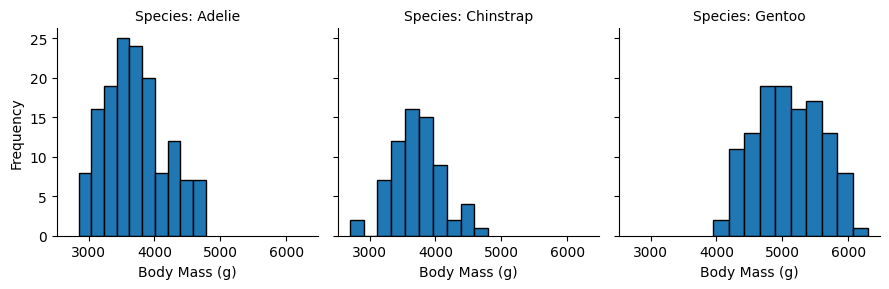

In [11]:

# Create a facet grid plot for different species
g = sns.FacetGrid(df1, col="species", col_wrap=3)
g.map(plt.hist, "body_mass_g", bins=10, edgecolor='black')

# Set labels and title
g.set_axis_labels("Body Mass (g)", "Frequency")
g.set_titles("Species: {col_name}")

# Adjust the layout
plt.tight_layout()

plt.show()

From the above diagram, we can see that Gentoo is the heaviest of the three species.

### Question 3:

Which of the following among culmen length, culmen depth and flipper length is most appropriate for predicting body mass?

We are interested to predict the body mass of the penguins through any one of the variables culmen length, culmen depth or flipper length. So we have to find the best predictor of body mass from these variables.

So, body mass will be our response variable(denoted by $𝑦$) and the predictor variables are the culmen length,culmen depth and flipper length (denoted by $𝑥_1$,$𝑥_2$ and $𝑥_3$ respectively).

In [12]:
y=df1['body_mass_g']
x1=df1['culmen_length_mm']
x2=df1['culmen_depth_mm']
x3=df1['flipper_length_mm']

We will first plot the scatter plots between body mass and the variables to see what kind of relationship they hold.

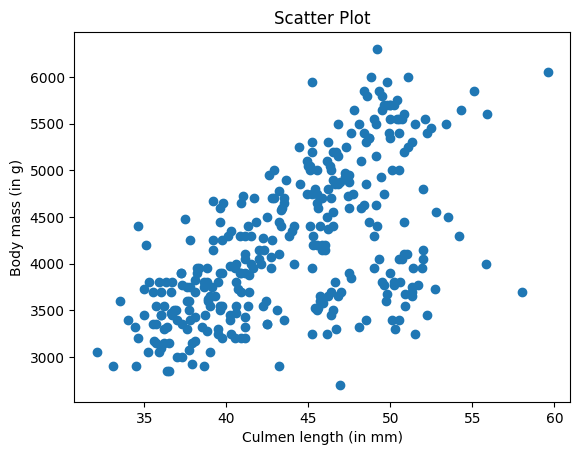

In [13]:
plt.scatter(x1, y)
plt.xlabel('Culmen length (in mm)')
plt.ylabel('Body mass (in g)')
plt.title('Scatter Plot')
plt.show()

* There is some kind of relationship between body mass and culmen length.

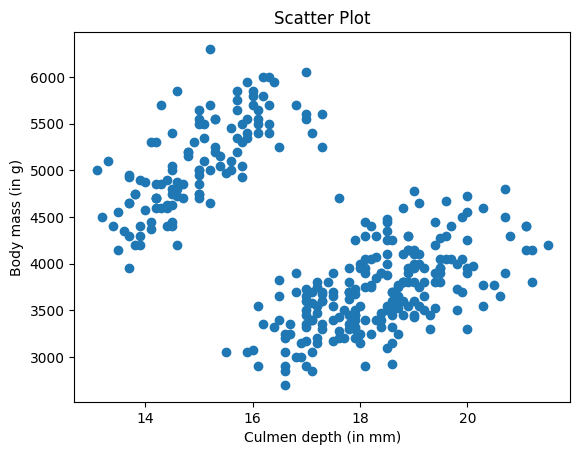

In [14]:
plt.scatter(x2, y)
plt.xlabel('Culmen depth (in mm)')
plt.ylabel('Body mass (in g)')
plt.title('Scatter Plot')
plt.show()

* There is poor kind of relationship between body mass and culmen depth.

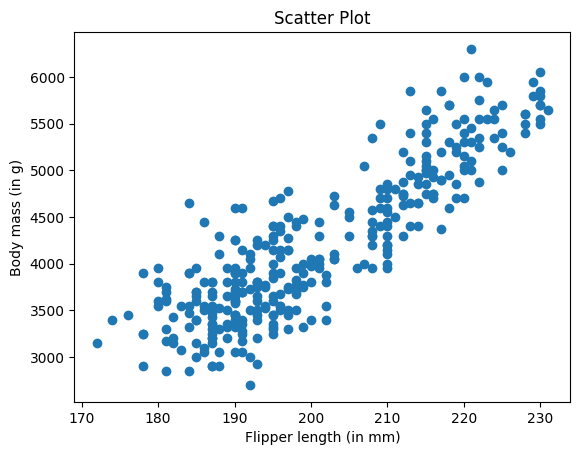

In [15]:
plt.scatter(x3, y)
plt.xlabel('Flipper length (in mm)')
plt.ylabel('Body mass (in g)')
plt.title('Scatter Plot')
plt.show()

* There is some kind of relationship between body mass and flipper length.

### Regression Analysis

Now we will do regression analysis for the three variables.

First, we do regression analysis between Body mass($𝑦$) and Culmen Length($𝑥_1$).

Our linear regression model will be
$𝑦 = 𝑎_1 + 𝑏_1𝑥_1 + 𝑒_1$

where,

$𝑦$ = response variable(body mass)

$𝑥_1$ = predictor variable(culmen length)

$𝑎_1$ and $𝑏_1$ are the constants of the regression and,

$𝑒_1$ is the error term associated with the observations.

Let us write , $𝑌 = 𝑎_1 + 𝑏_1𝑥_1$ .

So the errors will be $𝑌 − 𝑦$ for all the observations.

In [16]:
# Reshape the data
x1 = np.array(x1).reshape(-1, 1)

# Create the LinearRegression model
model = LinearRegression()

# Fit the model to the data
reg1=model.fit(x1,y)

# Get the coefficients and intercept
coefficients = reg1.coef_
intercept = reg1.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:",intercept)

Coefficients: [86.79175965]
Intercept: 388.84515876027353


Similarly for $x_2$ variable.

In [17]:
# Reshape the data
x2 = np.array(x2).reshape(-1, 1)

# Create the LinearRegression model


# Fit the model to the data
reg2=model.fit(x2,y)

# Get the coefficients and intercept
coefficients = reg2.coef_
intercept = reg2.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:",intercept)

Coefficients: [-193.00610589]
Intercept: 7519.980782733277


And again for $x_3$.

In [18]:
# Reshape the data
x3 = np.array(x3).reshape(-1, 1)

# Create the LinearRegression model


# Fit the model to the data
reg3=model.fit(x3,y)

# Get the coefficients and intercept
coefficients = reg3.coef_
intercept = reg3.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:",intercept)

Coefficients: [50.15326594]
Intercept: -5872.092682842825


### Residual plots:

If the residual plot is completely random, then we can say that the corresponding linear regression model will be a good model.

For variable $x_1$.

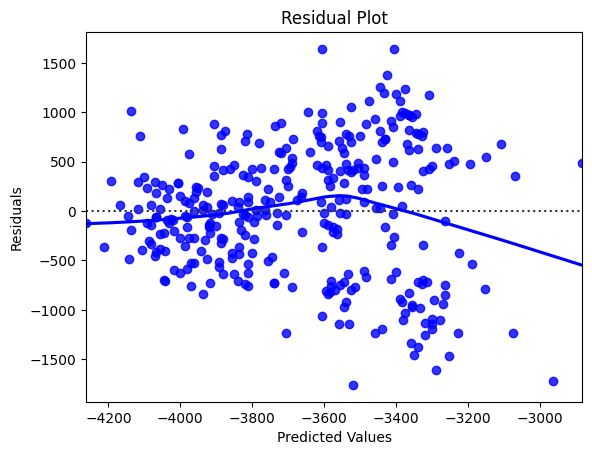

In [19]:
# Get the predicted values
y_pred = reg1.predict(x1)

# Calculate the residuals
residuals = y - y_pred

# Create the residual plot
sns.residplot(x=y_pred, y=residuals, lowess=True, color='b')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Show the plot
plt.show()

For variable $x_2$:

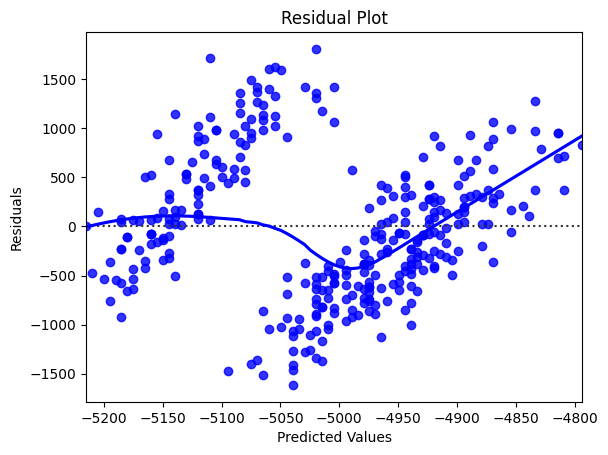

In [20]:
# Get the predicted values
y_pred = reg2.predict(x2)

# Calculate the residuals
residuals = y - y_pred

# Create the residual plot
sns.residplot(x=y_pred, y=residuals, lowess=True, color='b')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Show the plot
plt.show()

For variable $x_3$:

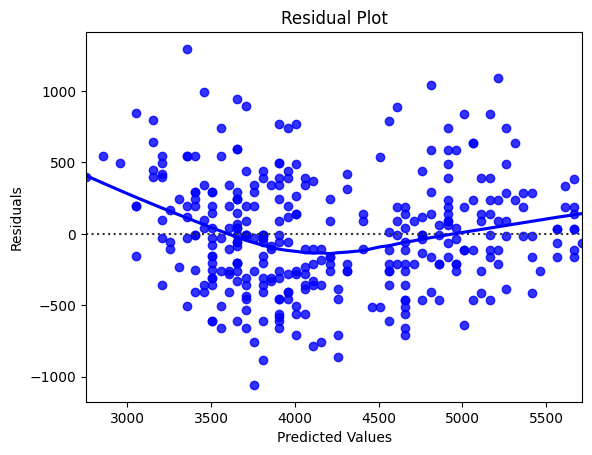

In [21]:
# Get the predicted values
y_pred = reg3.predict(x3)

# Calculate the residuals
residuals = y - y_pred

# Create the residual plot
sns.residplot(x=y_pred, y=residuals, lowess=True, color='b')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Show the plot
plt.show()

* We can see that there exists some pattern in the residual plots of culmen length and culmen depth, whereas, in the residual plot of flipper length, the plotted points are almost random.

### Comparison with adjusted R squared values.

In [22]:

# Calculate the adjusted R-squared
n = len(y)               # Number of observations
p = x1.shape[1]          # Number of predictors (features)
reg1=model.fit(x1,y)
r_squared = reg1.score(x1, y)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Print the adjusted R-squared value
print("Adjusted R-squared:", adjusted_r_squared)


Adjusted R-squared: 0.3454811690268704


In [23]:
# Calculate the adjusted R-squared
n = len(y)               # Number of observations
p = x2.shape[1]           # Number of predictors (features)
reg2=model.fit(x2,y)
r_squared = reg2.score(x2, y)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Print the adjusted R-squared value
print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.22045074354035799


In [24]:
# Calculate the adjusted R-squared
n = len(y)               # Number of observations
p = x3.shape[1]           # Number of predictors (features)
reg3=model.fit(x3,y)
r_squared = reg3.score(x3, y)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Print the adjusted R-squared value
print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.7613734025287309


So, the different adjusted $𝑅_2$ statistics are:
* $𝑅^2$ value for the regression model between Body mass(𝑦) and Culmen Length(𝑥1) : 0.3455

* $𝑅^2$ value for the regression model between Body mass(𝑦) and Culmen Depth(𝑥2): 0.2205

* $𝑅^2$ value for the regression model between Body mass(𝑦) and Flipper Length(𝑥3): 0.7614

Hence, from both the values of adjusted $𝑅_2$, as well as from the residual plots , `flipper length` serves as the best predictor to predict body mass from both angles. 

We can conclude that among the three variables (Culmen length, culmen depth and flipper length), `𝑓𝑙𝑖𝑝𝑝𝑒𝑟 𝑙𝑒𝑛𝑔𝑡ℎ` is the most suitable variable for predicting body mass of the penguins.